In [1]:
%display latex

Starting with simplifying sich factors to the form we will deal with, first we obtain:

$$L\mu=t_0x\left(\frac{t_0^{-2}+(1+x^2)^2}{1+x^2}\right)^{1/2}=t_0d$$

and:

$$LT=\frac{t_0}{\pi}\left(1+\frac{1}{2t_0^2}+\frac{3}{2}x^2-\frac{1}{2}x^6\right)(1+x^2)^{-3/2}$$

$$\mathcal{J}_T=L^3Q_{D3}\cdot\frac{2\pi^2}{t^3_0}$$

And the equations from deductions (to be doublechecked):

$$t^2_0=\frac{(L\mu)^2\cdot (1+x^2)-x^2}{(1+x^2)^2\cdot x^2}$$

$$(\pi LT)^2\cdot 4x^2(1+x^2)\left((L\mu)^2(1+x^2)-x^2\right)=\left((L\mu)^2(1+x^2)(2-x^2)-(x^2-x^4)\right)^2$$

In [3]:
var('x2, t_02,J_T,rho,d')
var('Lmu, LT, LQ')


(Lmu, LT, LQ)

In [6]:
t_02 = (Lmu^2*(1+x2)-x2)/((1+x2)^2*x2)
t_02
J_T = LQ*2*pi^2/t_02^(3/2)
J_T

2*pi^2*LQ/((Lmu^2*(x2 + 1) - x2)/((x2 + 1)^2*x2))^(3/2)

In [7]:
d0 = sqrt(x2)*sqrt((1/t_02+(1+x2)^2)/(1+x2))
V_eff = function('V_eff')()
V_effperf = function('V_effperf')()
V_effperf = ((1-rho^2)/(x2+rho^2)*(d*J_T-1/t_02*x2-x2^3
                                   +(1+3*x2)*rho^2+rho^4)
             +1/(x2+rho^2)*((1-rho^2)*(x2^3-(1+3*x2)*rho^2
                                       -rho^4-1/t_02*rho^2)*
                            ((1/t_02*x2-2*d*J_T)*(1+x2)+J_T^2+
                             (x2+rho^2)^3)+x2*(1+x2)^3)^(1/2))
V_eff = V_effperf(d=d0)
V_effperf

-(rho^4 + rho^2*(3*x2 + 1) - (x2 + 1)^2*x2^2/(Lmu^2*(x2 + 1) - x2) - x2^3 + 2*pi^2*LQ*d/((Lmu^2*(x2 + 1) - x2)/((x2 + 1)^2*x2))^(3/2))*(rho^2 - 1)/(rho^2 + x2) + sqrt((x2 + 1)^3*x2 + (4*pi^4*LQ^2*(x2 + 1)^6*x2^3/(Lmu^2*(x2 + 1) - x2)^3 + (rho^2 + x2)^3 + ((x2 + 1)^2*x2^2/(Lmu^2*(x2 + 1) - x2) - 4*pi^2*LQ*d/((Lmu^2*(x2 + 1) - x2)/((x2 + 1)^2*x2))^(3/2))*(x2 + 1))*(rho^4 + rho^2*(x2 + 1)^2*x2/(Lmu^2*(x2 + 1) - x2) + rho^2*(3*x2 + 1) - x2^3)*(rho^2 - 1))/(rho^2 + x2)

The effective potential being discussed about has such form:

$$\begin{aligned}\mathcal{V}_{eff} = &\frac{1-\rho^2}{x^2+\rho^2}\left(d\mathcal{J}_T-t^{-2}_{0}x^2-x^6+(1+3x^2)\rho^2+\rho^4\right)\\ &+\frac{1}{x^2+\rho^2}\left[(1-\rho^2)\left(x^6-(1+3x^2)\rho^2-\rho^4-t_0^{-2}\rho^2\right)\right.\\ &\times\left.\left((t_0^{-2}x^2-2d\mathcal{J}_T)(1+x^2)+\mathcal{J}^2_T+(x^2+\rho^2)^3+x^2(1+x^2)^3\right)\right]^{1/2}\end{aligned}$$

With such conditions:

> * Dimenshionless of effective potential and angular momentum: $\mathcal{V}_{eff}\equiv RV_{eff}/r^4_{H}$ and $\mathcal{J}_T\equiv J_T/(r^3_{H}R)=2Q_{D3}/(\pi T^3_0)$
> * Other dimensionless conditions: $t_0\equiv L\pi T_0, x\equiv Q/r_H, \rho\equiv r/r_H$
> * The shorthand $d\equiv x\sqrt{\frac{t^{-2}_0+(1+x^2)^2}{1+x^2}}$


Now we put `eqx` as the function for the equation that gives $x^2$ (written as `x2` in code) and find its roots:

In [8]:
eqx = (pi*LT)^2*4*x2*(1+x2)*(Lmu^2*(1+x2) - x2) - (
    Lmu^2*(1+x2)*(2-x2)-(x2-x2^2))^2
eqx
eqx(Lmu=1).simplify()

4*pi^2*LT^2*(x2 + 1)*x2 - ((x2 + 1)*(x2 - 2) - x2^2 + x2)^2

In [9]:
eq = eqx==0
find_root(eqx(Lmu=1, LT=2.5), 0.1, 0)

0.01595677084690416

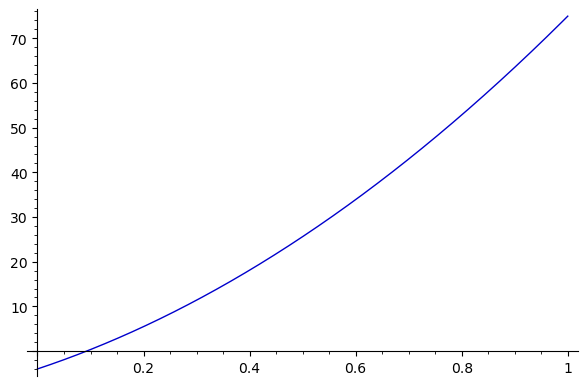

In [10]:
plot([eqx(Lmu=1, LT=1)], x2, 0, 1)

In [11]:
t_02(Lmu=0.5, LT=2, x2=0.00629)

38.5096529470876

In [12]:
from sage.repl.ipython_kernel.interact import sage_interactive

In [13]:
@interact
def myplot(x=2.5, t=2):
    show(plot([eqx(Lmu=x,LT=t)],x2, 0, 0.5))

Interactive function <function myplot at 0x7f6f09f1d550> with 2 widgets
  x: FloatSlider(value=2.5, descriptio…

In [14]:
X2alt=solve(eqx(Lmu=1)==0, x2)

In [15]:
plot3d(solve(eqx(Lmu=Lmu)==0, x2)[1].rhs(), (Lmu, 0, 2.5), (LT, 0, 2.5))

Graphics3d Object

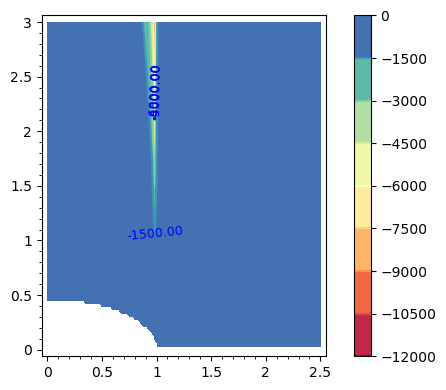

In [16]:
contour_plot(solve(eqx==0, x2)[2].rhs(), (Lmu, 0, 2.5), (LT, 0, 3), cmap='Spectral'
             ,colorbar=true,labels=true)

In [17]:
import matplotlib.cm; matplotlib.cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

In [18]:
X23=[a.rhs() for a in solve(eqx==0, x2)]
X23

[-pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT/(Lmu^2 - 1) - 1/2*sqrt(4*(pi^2*LT^2*Lmu^2 + Lmu^4 - Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)/(Lmu^4 - 2*Lmu^2 + 1) + 2*(2*pi^2*LT^2 + Lmu^2 - 1)^2/(Lmu^2 - 1)^2 - (Lmu^2 - 1)*(4*(pi^2*LT^2*Lmu^2 - Lmu^4 + Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (2*pi^2*LT^2 + Lmu^2 - 1)^3/(Lmu^2 - 1)^3 + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)*(2*pi^2*LT^2 + Lmu^2 - 1)/((Lmu^4 - 2*Lmu^2 + 1)*(Lmu^2 - 1)))/(pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT)) + 1/2*(2*pi^2*LT^2 + Lmu^2 - 1)/(Lmu^2 - 1),
 -pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT/(Lmu^2 - 1) + 1/2*sqrt(4*(pi^2*LT^2*Lmu^2 + Lmu^4 - Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)/(Lmu^4 - 2*Lmu^2 + 1) + 2*(2*pi^2*LT^2 + Lmu^2 - 1)^2/(Lmu^2 - 1)^2 - (Lmu^2 - 1)*(4*(pi^2*LT^2*Lmu^2 - Lmu^4 + Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (2*pi^2*LT^2 + Lmu^2 - 1)^3/(Lmu^2 - 1)^3 + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)*(2*pi^2*LT^2 + Lmu^2 - 1)/((Lmu^4 - 2*Lmu^2 + 1)*(Lmu^2 - 1)))/(pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT)) + 1/2*(2*pi^2*LT^2 + Lmu^2 - 1)/(Lmu^2 - 1),
 pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT/(Lmu^2 - 1) - 1/2*sqrt(4*(pi^2*LT^2*Lmu^2 + Lmu^4 - Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)/(Lmu^4 - 2*Lmu^2 + 1) + 2*(2*pi^2*LT^2 + Lmu^2 - 1)^2/(Lmu^2 - 1)^2 + (Lmu^2 - 1)*(4*(pi^2*LT^2*Lmu^2 - Lmu^4 + Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (2*pi^2*LT^2 + Lmu^2 - 1)^3/(Lmu^2 - 1)^3 + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)*(2*pi^2*LT^2 + Lmu^2 - 1)/((Lmu^4 - 2*Lmu^2 + 1)*(Lmu^2 - 1)))/(pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT)) + 1/2*(2*pi^2*LT^2 + Lmu^2 - 1)/(Lmu^2 - 1),
 pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT/(Lmu^2 - 1) + 1/2*sqrt(4*(pi^2*LT^2*Lmu^2 + Lmu^4 - Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)/(Lmu^4 - 2*Lmu^2 + 1) + 2*(2*pi^2*LT^2 + Lmu^2 - 1)^2/(Lmu^2 - 1)^2 + (Lmu^2 - 1)*(4*(pi^2*LT^2*Lmu^2 - Lmu^4 + Lmu^2)/(Lmu^4 - 2*Lmu^2 + 1) + (2*pi^2*LT^2 + Lmu^2 - 1)^3/(Lmu^2 - 1)^3 + (4*pi^2*(2*Lmu^2 - 1)*LT^2 + 3*Lmu^4 - 2*Lmu^2 - 1)*(2*pi^2*LT^2 + Lmu^2 - 1)/((Lmu^4 - 2*Lmu^2 + 1)*(Lmu^2 - 1)))/(pi*sqrt(pi^2*LT^2 + 2*Lmu^2 - 2)*LT)) + 1/2*(2*pi^2*LT^2 + Lmu^2 - 1)/(Lmu^2 - 1)]

In [19]:
@interact
def _(lt=input_box(1.5), lmu=input_box(2.0)):
    print([N(X23[i](LT=lt,Lmu=lmu)) for i in [0..3]])

Interactive function <function _ at 0x7f6f08744280> with 2 widgets
  lt: EvalText(value='1.50000000000000', de…

For the (assumed) solutions to $x^2$, we try solving $t_0^2$ and put the values to $V_{eff}$:

In [20]:
x21 = N(X23[1](LT=1,Lmu=9))
t_021 = N(t_02(x2=x21,LT=1,Lmu=9))
N(V_eff(LT=1,Lmu=9,x2=X23[1](LT=1,Lmu=9),LQ=80,rho=1))

1.65612335260698

Of the two positive solutions of $x^2$ we may choose the `X23[1]` since `X23[3]` is not even guaranteeing a real `V_eff`. I would wonder about the reason. 

In [31]:
from sage.plot.plot import minmax_data
@interact
def _(LT=input_box(2.0, width=10, label="$LT$"),
     Lmu=input_box(1.5, width=10, label="$L\\mu$"),
     LQ=input_box(80, width=10, label="$L^3Q_{D3}$"),
   #  rho=input_box(5, width=10, label="$\\rho$")
     ):
    x2tmp=N(X23[3](LT=LT,Lmu=Lmu))
    show(plot([V_eff(LT=LT,Lmu=Lmu,x2=x2tmp,
                      LQ=LQ)],rho,0.5,15))
    print(x2tmp)
    #print(V_eff(LT=LT,Lmu=Lmu,x2=X23[1](LT=LT,Lmu=Lmu),
    #           LQ=LQ));

    #  print(N(V_eff(LT=LT,Lmu=Lmu,x2=X23[1](LT=LT,Lmu=Lmu),
   #               LQ=LQ,rho=rho)))

Interactive function <function _ at 0x7f6f021295e0> with 3 widgets
  LT: EvalText(value='2.00000000000000', de…

In [22]:
def Vminrho(LT,Lmu,LQ,rhomin,rhomax):
    x2tmp = N(X23[1](LT=LT,Lmu=Lmu)) if Lmu>=1.0001 or Lmu<=0.9999 else N(X2alt[1].rhs()(LT=LT,Lmu=Lmu))
    f = lambda x: N(V_eff(LT=LT,Lmu=Lmu,x2=x2tmp,
                      LQ=LQ, rho=x))
    
    return find_local_minimum(f,rhomin,rhomax)
Vminrho(1,1.00001,80,1.01,15)[1]

13.21864601921056

In [23]:
def Vmaxrho(LT,Lmu,LQ,rhomin,rhomax):
    x2tmp = N(X23[1](LT=LT,Lmu=Lmu)) if Lmu>=1.0001 or Lmu<=0.9999 else N(X2alt[1].rhs()(LT=LT,Lmu=Lmu))
    f = lambda x: N(V_eff(LT=LT,Lmu=Lmu,x2=x2tmp,
                      LQ=LQ, rho=x))
    
    return find_local_maximum(f,rhomin,rhomax)


In [24]:
@interact
def _(LT=input_box(2.0, width=10, label="$LT$"),
     Lmu=input_box(1, width=10, label="$L\\mu$"),
     LQ=input_box(80, width=10, label="$L^3Q_{D3}$"),
   #  rho=input_box(5, width=10, label="$\\rho$")
     ):
    show(plot([V_eff(LT=LT,Lmu=1,x2=N(solve(eqx(Lmu=1)==0, x2)[1].rhs()(LT=LT,Lmu=1)),
                      LQ=LQ)],rho,0.5,40))
    #print(V_eff(LT=LT,Lmu=Lmu,x2=X23[1](LT=LT,Lmu=Lmu),
    #           LQ=LQ));

    #  print(N(V_eff(LT=LT,Lmu=Lmu,x2=X23[1](LT=LT,Lmu=Lmu),
   #               LQ=LQ,rho=rho)))

Interactive function <function _ at 0x7f6f0864e940> with 3 widgets
  LT: EvalText(value='2.00000000000000', de…

In [25]:
N(V_eff(LT=3,rho=1,
      x2=N(solve(eqx(Lmu=1)==0, x2)[1].rhs()(LT=1,Lmu=3)),LQ=80))

0.318309886183791

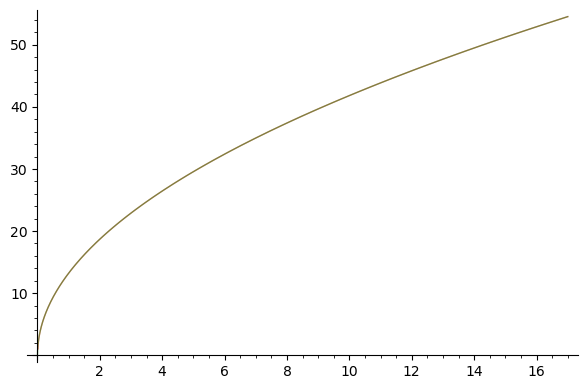

In [26]:
ttmp=N(t_02(LT=1,Lmu=1,x2=X2alt[1].rhs()(LT=1,Lmu=1)))
plta=plot(lambda t:Vminrho(LT=1,Lmu=1,LQ=t*80,rhomin=1.001,rhomax=60)[1],0.01,17,color='red',alpha=0.5)
pltb=plot(sqrt(2)*pi*sqrt(LQ*80)/sqrt(ttmp),LQ,0,17,color='green',alpha=0.5)
pltc=plot(lambda t:Vminrho(LT=1,Lmu=t,LQ=80,rhomin=1.001,rhomax=60)[1],0.01,17,color='blue',alpha=0.5)

plta+pltb

In [27]:
t_02(LT=1,Lmu=1,x2=N(solve(eqx(Lmu=1)==0, x2)[1].rhs()(LT=1,Lmu=1)))

9.03211482625857

In [28]:
Vminrho(LT=1,Lmu=12,LQ=80,rhomin=1.001,rhomax=60)

(-2.81601434309448, 4.25540288169173)

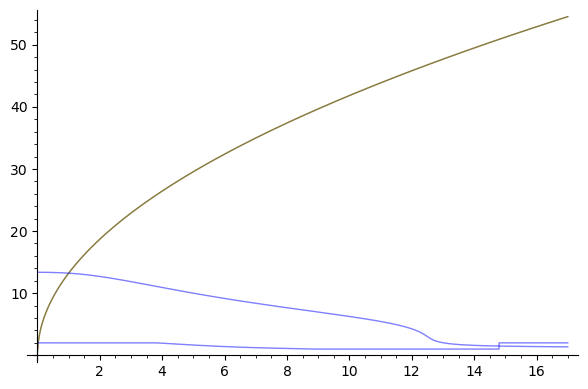

In [33]:
pltd=plot(lambda t:Vmaxrho(LT=1,Lmu=t,LQ=80,rhomin=1.00001,rhomax=2)[1],0.01,17,color='blue',alpha=0.5)

plta+pltb+pltc+pltd

In [38]:
plte = plot(lambda t:Vminrho(LT=t,Lmu=1,LQ=80,rhomin=1.00001,rhomax=60)[1],0.01,17,color='red',alpha=0.5)

In [39]:
pltf = plot(lambda t:Vmaxrho(LT=t,Lmu=1,LQ=80,rhomin=1.00001,rhomax=60)[1],0.01,17,color='red',alpha=0.5)

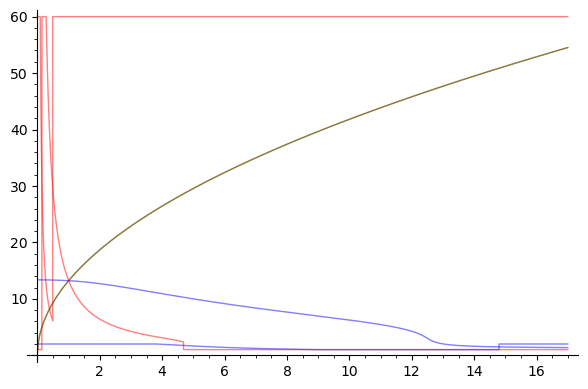

In [40]:
plta+pltb+pltc+pltd+plte+pltf

In [60]:
V_eff

-(rho^4 + rho^2*(3*x2 + 1) - (x2 + 1)^2*x2^2/(Lmu^2*(x2 + 1) - x2) - x2^3 + 2*pi^2*LQ*sqrt(x2)*sqrt(((x2 + 1)^2 + (x2 + 1)^2*x2/(Lmu^2*(x2 + 1) - x2))/(x2 + 1))/((Lmu^2*(x2 + 1) - x2)/((x2 + 1)^2*x2))^(3/2))*(rho^2 - 1)/(rho^2 + x2) + sqrt((x2 + 1)^3*x2 + (4*pi^4*LQ^2*(x2 + 1)^6*x2^3/(Lmu^2*(x2 + 1) - x2)^3 + (rho^2 + x2)^3 + ((x2 + 1)^2*x2^2/(Lmu^2*(x2 + 1) - x2) - 4*pi^2*LQ*sqrt(x2)*sqrt(((x2 + 1)^2 + (x2 + 1)^2*x2/(Lmu^2*(x2 + 1) - x2))/(x2 + 1))/((Lmu^2*(x2 + 1) - x2)/((x2 + 1)^2*x2))^(3/2))*(x2 + 1))*(rho^4 + rho^2*(x2 + 1)^2*x2/(Lmu^2*(x2 + 1) - x2) + rho^2*(3*x2 + 1) - x2^3)*(rho^2 - 1))/(rho^2 + x2)

In [62]:
V_effdiff=diff(V_eff(rho),rho)

In [123]:
@interact
def _(LT=input_box(2.0, width=10, label="$LT$"),
     Lmu=input_box(15, width=10, label="$L\\mu$"),
     LQ=input_box(80, width=10, label="$L^3Q_{D3}$"),
   #  rho=input_box(5, width=10, label="$\\rho$")
     ):
    x2tmp=N(X23[1](LT=LT,Lmu=Lmu))
    show(plot([diff(V_eff(LT=LT,Lmu=Lmu,x2=x2tmp,
                      LQ=LQ),rho)],rho,0.5,15))
    print(N(diff(V_eff(LT=LT,Lmu=Lmu,x2=x2tmp,
                      LQ=LQ),rho)(rho=0.5)))

Interactive function <function _ at 0x7f6efacb3940> with 3 widgets
  LT: EvalText(value='2.00000000000000', de…